In [48]:
from scipy.stats.stats import pearsonr

In [49]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import pandas as pd
from time import time
import matplotlib.pyplot as plt
#from sklearn.cross_validation import train_test_split
import seaborn as sns
%matplotlib inline


import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
import Experiment_Ready as experim


In [52]:

import os
import sys

#os.chdir('C:/Users/murat.ozemre/Documents/MOZEMRE-OZEL/Doktora/2017 Tez/Veri Analizi/Ver 3 Tez Izleme Calısmaları')

In [53]:
from sklearn import metrics
import statsmodels
from math import sqrt
from math import log
from sklearn.ensemble import RandomForestRegressor
from datetime import datetime
datetime.now().strftime('%m-%d %H:%M')

'07-20 13:06'

In [54]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer

In [56]:
Product_Type_Options = [841810,841840,841850]

Product=Product_Type_Options[1] #841810
Productname=Product

Exp_Country='TUR' # 'CHN'
Imp_Country='GBR'

if Exp_Country=='CHN':
    Currency='CNY'
    EXP0='TUR'   
elif Exp_Country=='TUR':
    Currency='TRY'
    EXP0='CHN'   
    
os.chdir('C:/Users/murat.ozemre/Desktop/Thesis_Project/Data_Sources_and_Preparation')    

In [57]:
MonthSeries="1"
MonthSeries_option=["1","2","3","6","12"]    

# For Single Combination of Month  and Feature

In [61]:
Data_Core1 = pd.ExcelFile('Data_{}_{}_{}.xlsx'.format(Exp_Country,Imp_Country,Product))
y = Data_Core1.parse('Y', header=0,index_col=None, na_values=['NA'])['{}_{}_{}'.format(Exp_Country,Imp_Country,Product)]
Z = Data_Core1.parse('Y', header=0,index_col=None, na_values=['NA'])[['Date','Year','Month']]

X = Data_Core1.parse('X{}'.format(MonthSeries), header=0,index_col=None, na_values=['NA'])
X.drop(['Date','Year','Month'], axis=1, inplace=True)
X_Column_Names=list(X.columns.values)
n_feature=X.shape[1]

Xhat = Data_Core1.parse('Xhat', header=0,index_col=None, na_values=['NA'])
Xhat.drop(['Date','Year','Month'], axis=1, inplace=True)

dependent_variable_type='log'

if dependent_variable_type=='same':
    dependent_variable=y
elif dependent_variable_type=='log':
    dependent_variable=y.apply(np.log)
elif dependent_variable_type=='sqrt':
    dependent_variable=y.apply(np.sqrt)

In [64]:
rs=3
Scaled_Train_Test_Split=experim.X_Y_scaler_train_test_Split(X,dependent_variable,Z,random=rs)

X_train = Scaled_Train_Test_Split[0]
X_test = Scaled_Train_Test_Split[1]
y_train = Scaled_Train_Test_Split[2]
y_test = Scaled_Train_Test_Split[3]
scaler_X = Scaled_Train_Test_Split[4]  
scaler_y = Scaled_Train_Test_Split[5]
scaled_value_X=Scaled_Train_Test_Split[6]
scaled_value_y=Scaled_Train_Test_Split[7]

(867,
 1010,
 0.086,
 0.086,
 array([1732.9999674 , 1425.99996823, 2327.99998508, 1684.0000589 ,
        2741.99993762, 2861.99991242, 3207.99997582, 3557.99992425,
        3327.99995061, 1288.99995531, 3741.0000636 , 3826.00012257,
        1544.00000051, 2712.00000977, 3961.99990084, 2032.00006482,
        3386.0001272 , 2823.00011157, 2664.9999121 , 3194.99995441,
        2020.99998592, 2564.9998892 , 1831.00004778, 3940.00000643,
        2052.99998797, 3211.00002128, 4064.00012964, 2115.00004958]),
 array([1953.99993634, 2754.00011948, 2941.99998341, 3747.99999408,
        2014.00005543, 3774.00003691, 2577.00007106, 2692.00005787,
        2554.00007369, 2396.99997717, 2567.99993467, 2035.99994984,
        1421.99995151, 2026.99994515, 2710.00006726, 2754.00011948,
        5581.00011607, 3774.00003691, 1701.9999366 , 2692.00005787,
        2026.99994515, 3081.00007054, 2154.99995338, 2743.00004058,
        2554.00007369, 2657.99998161, 4606.99992997, 3156.99999312]))

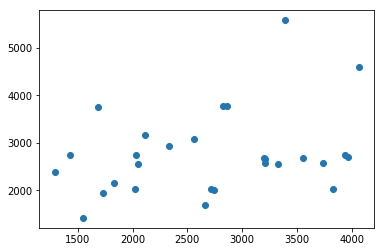

In [65]:
from sklearn.tree import DecisionTreeRegressor

# Decison tree regressor model
dt = DecisionTreeRegressor()

# Decison tree regressor model train
DecisionTreeRegressor.fit(dt,X_train,y_train)

# Decison tree regressor model predict
y_predict_test = dt.predict(X_test)

# Compare predicted Y and real Y 
experim.inverse_scale_and_graph_Y_predict_and_test(y_predict_test,y_test,scaler_y,'YES',dependent_variable_type)


0.043

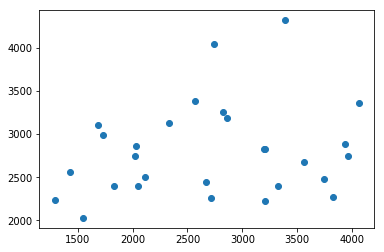

In [66]:
# Random Foest Regressor model
rfc=RandomForestRegressor(n_estimators=3000)

# Random Foest Regressor model train
RandomForestRegressor.fit(rfc,X_train,y_train)

# Random Foest Regressor mode predict
y_predict_test = rfc.predict(X_test)

# Compare predicted Y and real Y 
experim.inverse_scale_and_graph_Y_predict_and_test(y_predict_test,y_test,scaler_y,'YES',dependent_variable_type)[3]

In [67]:
rfc.feature_importances_

array([0.3561193 , 0.0031086 , 0.00281077, 0.00602687, 0.02055463,
       0.01092441, 0.00602215, 0.01780333, 0.02285457, 0.01589844,
       0.01014392, 0.0027313 , 0.00575309, 0.00563465, 0.00988762,
       0.00350413, 0.00267334, 0.0023182 , 0.00549669, 0.00519419,
       0.00268363, 0.00694738, 0.00818685, 0.00112435, 0.00107506,
       0.00391101, 0.04844695, 0.00263902, 0.0216979 , 0.00450346,
       0.00128225, 0.00480253, 0.01812931, 0.00292896, 0.00566984,
       0.00432297, 0.0066078 , 0.00966659, 0.00552458, 0.00489308,
       0.00461961, 0.00428422, 0.00462626, 0.00259648, 0.00301126,
       0.00256054, 0.01001538, 0.00337017, 0.00283846, 0.00611139,
       0.01753491, 0.0011153 , 0.00104043, 0.00441562, 0.01085191,
       0.00135119, 0.01024574, 0.00486183, 0.00357821, 0.02852024,
       0.01394042, 0.00334042, 0.00632254, 0.00798002, 0.01455431,
       0.02172404, 0.01224042, 0.0044867 , 0.00518262, 0.00318658,
       0.00590952, 0.00280519, 0.00641096, 0.00291147, 0.03605

In [15]:
if Exp_Country=='CHN':
        if Product==841810:
            MonthSeries="_34"
            percent=50
            dependenttype='same'
        elif Product==841840:
            MonthSeries="_345"
            percent=50
            dependenttype='log'
        elif Product==841850:
            MonthSeries="_34"
            percent=100
            dependenttype='log'
elif Exp_Country=='TUR':
        if Product==841810:
            MonthSeries="_67"
            percent=50
            dependenttype='same'
        elif Product==841840:
            MonthSeries="4"
            percent=50
            dependenttype='same'
        elif Product==841850:
            MonthSeries="_45"
            percent=50
            dependenttype='same'

In [31]:
y = Data_Core1.parse('Y', header=0,index_col=None, na_values=['NA'])['{}_{}_{}'.format(Exp_Country,Imp_Country,Product)]
Z = Data_Core1.parse('Y', header=0,index_col=None, na_values=['NA'])[['Date','Year','Month']]

X = Data_Core1.parse('X{}'.format(MonthSeries), header=0,index_col=None, na_values=['NA'])
X.drop(['Date','Year','Month'], axis=1, inplace=True)
X_Column_Names=list(X.columns.values)
n_feature=X.shape[1]

Xhat = Data_Core1.parse('Xhat', header=0,index_col=None, na_values=['NA'])
Xhat.drop(['Date','Year','Month'], axis=1, inplace=True)

if dependent_variable_type=='same':
    dependent_variable=y
elif dependent_variable_type=='log':
    dependent_variable=y.apply(np.log)
elif dependent_variable_type=='sqrt':
    dependent_variable=y.apply(np.sqrt)

# Start -- For single combination calling Feature Selection Functions

Features scores:
1. important feature TUR_FRA_841840-4 (original rank 4)
2. important feature CCI_GBR-4 (original rank 18)
3. important feature GDP_GBR-4 (original rank 20)
4. important feature NLD_GBR_841840-4 (original rank 8)
5. important feature TUR_DEU_841840-4 (original rank 3)
6. important feature HUN_GBR_841840-4 (original rank 9)
7. important feature EPU_World-4 (original rank 12)
8. important feature GBP-4 (original rank 26)
9. important feature TRY-4 (original rank 25)
10. important feature TUR_SWE_841840-4 (original rank 5)
11. important feature GDP_TUR-4 (original rank 16)
12. important feature TUR_GBR_841840_UV-4 (original rank 10)
13. important feature CCI_TUR-4 (original rank 14)
14. important feature World-4 (original rank 27)
15. important feature EPU_GBR-4 (original rank 11)
16. important feature CLI_GBR-4 (original rank 19)
17. important feature CLI_TUR-4 (original rank 15)
18. important feature CHN_GBR_841840-4 (original rank 6)
19. important feature BCI_TUR-4 (ori

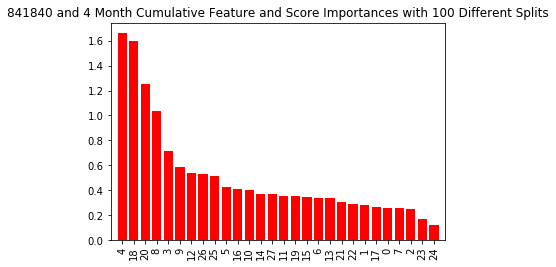

In [20]:
# Main for 3 Version for Train Test Split and Feature selection 
# http://blog.datadive.net/selecting-good-features-part-iii-random-forests/
# Use both RF Importances and R2 Accuracy with different number of splits


number_of_split_for_feature=100
result=experim.get_feature_importance_result (X,dependent_variable,Z,n_feature,number_of_split_for_feature)
scored_feature_indices=result[0]
feature_score=result[1]

print ("Features scores:") 

for f in range(n_feature):

    print("%d. important feature %s (original rank %d)" % (f+1, X_Column_Names[scored_feature_indices[f]], scored_feature_indices[f]))


# Plot the feature importances of the forest
plt.gcf().clear()
plt.figure()
plt.title("{} and {} Month Cumulative Feature and Score Importances with {} Different Splits".format(Product,MonthSeries,number_of_split_for_feature))
plt.bar(range(n_feature), feature_score[scored_feature_indices],
       color="r",  align="center")
plt.xticks(range(n_feature), scored_feature_indices,rotation=90)
plt.xlim([-1, n_feature])

#fig_size = plt.rcParams["figure.figsize"]
#fig_size[0] = 20
#fig_size[1] = 12
#plt.rcParams["figure.figsize"] = fig_size
plt.savefig("Plots_Feature_Selection/{} and {} Month Cumulative Feature and Score Importances with {} Different Splits.png".format(Product,MonthSeries,number_of_split_for_feature), format='png', dpi=300)

plt.show()

    
    

# End -- For single combination calling Feature Selection Functions

In [32]:
# Calling function by single parameter set 
a=experim.randomforest(X_train, X_test, y_train, y_test,scaler_y,
                   rand=50,is_random_fixed='TRUE',dependenttype=dependent_variable_type,
                   est=200,min_leaf=5,feat=10,max_leaf=10,min_weight=0.0,min_impurity=1e-07)

randomforest rs= 50
R2_Test 0.952 R2_Train 0.0


In [33]:
# By using Ver 3 for Feature Selection results
# Percentile variable takes the most important variables according to its feature score and omits the others.
# ie.25 percentile takes %75 importance variables and omits %25 least important features
percent=50
percentile=100-percent
threshold_for_feature_selection=np.percentile(feature_score[scored_feature_indices], percentile)
X_threshold=X.iloc[:,scored_feature_indices[feature_score[scored_feature_indices]>threshold_for_feature_selection]]

# Train Test Split after percentile selection

Scaled_Train_Test_Split=experim.X_Y_scaler_train_test_Split(X_threshold,dependent_variable,Z)

X_train = Scaled_Train_Test_Split[0]
X_test = Scaled_Train_Test_Split[1]
y_train = Scaled_Train_Test_Split[2]
y_test = Scaled_Train_Test_Split[3]
scaler_X = Scaled_Train_Test_Split[4]  
scaler_y = Scaled_Train_Test_Split[5]
scaled_value_X=Scaled_Train_Test_Split[6]
scaled_value_y=Scaled_Train_Test_Split[7]


IndexError: positional indexers are out-of-bounds

In [32]:
# Random Foest Regressor model
rfc=RandomForestRegressor(n_estimators=3000,random_state=50)

# Random Foest Regressor model train
RandomForestRegressor.fit(rfc,X_train,y_train)

# Random Foest Regressor mode predict
y_predict_test = rfc.predict(X_test)

# Compare predicted Y and real Y 
experim.inverse_scale_and_graph_Y_predict_and_test(y_predict_test,y_test,scaler_y,'NO',dependent_variable_type)[3]

0.439

In [33]:
experim.randomforest(X_train, X_test, y_train, y_test,scaler_y,est=3000,rand=50)

randomforest rs= 50


((0,
  0,
  0.44,
  0.44,
  array([7.45760912, 7.26262856, 7.75276437, 7.42892739, 7.6270574 ,
         7.61579078, 7.43955948, 8.17695412, 8.1101266 , 8.309923  ,
         8.22710806, 8.24957545, 7.34213168, 7.90544179, 8.2845037 ,
         7.95927569, 8.12740403, 7.94555551, 7.88795934, 8.06934244,
         7.61677624, 7.84971403, 7.5126178 , 8.27893661, 8.27078053,
         8.07433785, 7.61431221, 7.61134758]),
  array([7.80919681, 7.66886291, 7.78799838, 7.93796917, 7.93216803,
         7.78661549, 7.73246132, 7.99487145, 7.88247624, 8.2220038 ,
         7.92349586, 7.80785296, 7.51652422, 7.88599881, 7.94883336,
         8.01565725, 8.01791283, 8.09517884, 7.83817963, 7.7779209 ,
         7.78201273, 7.83220294, 7.84900285, 7.96955185, 8.22538857,
         7.99624201, 7.72047911, 7.95936439])),
 (0,
  0,
  0.956,
  0.956,
  array([7.88532919, 7.1616218 , 7.56786218, 7.65207039, 8.2395936 ,
         8.19450542, 7.74586836, 8.47114935, 7.84031283, 8.19836422,
         7.5745584 , 8.

# PLOT FOR RESULTS

In [69]:
# Yeni Tune parametresi

feat= 10
min_leaf= 5
max_leaf= 100
min_impurity= 0.000001 
min_weight= 0.0001
est= 5000
#######################
 

dependenttype=dependent_variable_type

# Default Tune parametresi
feat= 'auto'
min_leaf= 1
max_leaf= 100
min_impurity= 1e-06
min_weight= 1e-05
est= 1000

#841810 
rs=31
limit=5000




In [70]:
 rfc=RandomForestRegressor(n_estimators=est,
                              min_samples_leaf=min_leaf,
                              random_state =rs,              
                              max_features=feat,
                              max_leaf_nodes=max_leaf,
                              min_weight_fraction_leaf =min_weight,
                              min_impurity_decrease=min_impurity
                            )
   
RandomForestRegressor.fit(rfc,X_train,y_train)
    
y_predict_test = rfc.predict(X_test)
y_predict_train = rfc.predict(X_train)
y_predict=rfc.predict(scaled_value_X.iloc[:len(y),:])
#y_predict_future=rfc.predict(scaled_value_X.iloc[len(y):,:])

# Inverse for test train and all data
result_test=experim.inverse_scale_and_graph_Y_predict_and_test(y_predict_test,y_test,scaler_y,'NO',dependenttype)
result_train=experim.inverse_scale_and_graph_Y_predict_and_test(y_predict_train,y_train,scaler_y,'NO',dependenttype)
result_all=experim.inverse_scale_and_graph_Y_predict_and_test(y_predict,scaled_value_y,scaler_y,'NO',dependenttype)


inv_y_train=pd.Series(result_train[4])
inv_y_predict_train=pd.Series(result_train[5])
inv_y_test=pd.Series(result_test[4])
inv_y_predict_test=pd.Series(result_test[5])
inv_y_all=pd.Series(result_all[4])
inv_y_predict_all=pd.Series(result_all[5])


R2_y_test=int(1000*pearsonr(inv_y_test,inv_y_predict_test )[0]**2)/1000
R2_y_train=int(1000*pearsonr(inv_y_train,inv_y_predict_train )[0]**2)/1000
R2_y_all=int(1000*pearsonr(inv_y_all,inv_y_predict_all )[0]**2)/1000

print (R2_y_test,'R2_y_test',R2_y_train,'R2_y_train',R2_y_all,'R2_y_all' )

0.042 R2_y_test 0.947 R2_y_train 0.765 R2_y_all


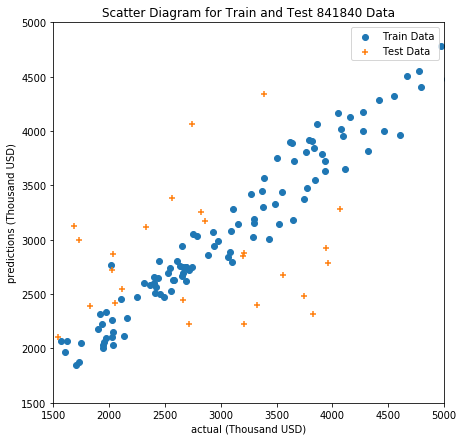

In [71]:

os.chdir('C:/Users/murat.ozemre/Desktop/Thesis_Project/Data_Learning_Prediction/Result_Plots')
fig = plt.figure(figsize=(7, 7))

plt.scatter(inv_y_train,inv_y_predict_train,label='Train Data')
plt.scatter(inv_y_test,inv_y_predict_test,marker='+' ,label='Test Data')

plt.legend()
plt.xlim(1500, limit)
plt.ylim(1500, limit)
plt.title("Scatter Diagram for Train and Test {} Data".format(Productname))
plt.xlabel("actual (Thousand USD)")
plt.ylabel("predictions (Thousand USD)")
plt.savefig('Scatter Diagram  {}_{}-{}.png'.format(Exp_Country,Imp_Country,Productname))
plt.show()




In [72]:
def format_func(value, tick_number):
    # find number of multiples of pi/2
    N = tick_number # int(np.round(2 * value / np.pi))
    
    if N == 1:
        return "200604"
    elif N == 2:
        return "200712"
    elif N == 3:
        return "200908"
    elif N ==4: 
        return "201104"
    elif N == 5:
        return "201212"
    elif N == 6:
        return "201408"
    elif N == 7: 
        return "201604"
    elif N == 8: 
        return "201712"
    else:
        return ""

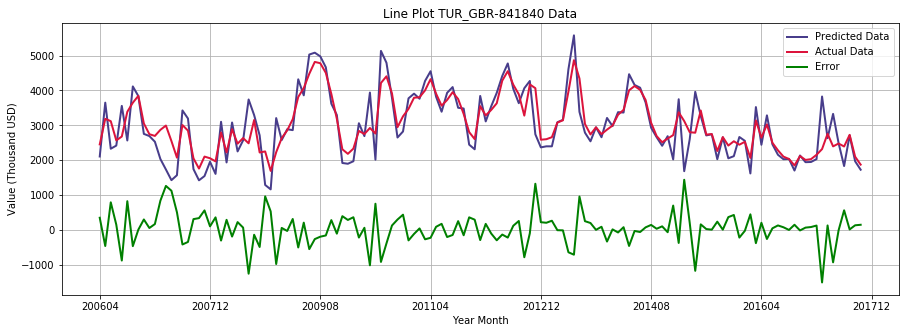

In [73]:

fig = plt.figure(figsize=(15, 5))

#predict=inv_y_predict_all
#real=inv_y_all

predict=inv_y_all
real=inv_y_predict_all

error=real-predict

ax = plt.axes()
#x = Z['Date']
xi = [i for i in range(0, len(predict))]


#inv_y_train
#inv_y_predict_train
#inv_y_test=pd.Series(result_test[4])
#inv_y_predict_test=pd.Series(result_test[5])



ax.plot(xi, predict, lw=2, color='darkslateblue',label='Predicted Data')
ax.plot(xi, real, lw=2, color='crimson', label='Actual Data')

ax.plot(xi, error, lw=2, color='green', label='Error')


# Set up grid, legend, and limits
ax.grid(True)
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
ax.legend(frameon=True)
plt.title("Line Plot {}_{}-{} Data".format(Exp_Country,Imp_Country,Productname))
plt.xlabel('Year Month')
plt.ylabel('Value (Thousand USD)') 

plt.savefig('Line Plot Test Data  {}_{}-{}.png'.format(Exp_Country,Imp_Country,Productname))

# For Combination of Month and Feature with Multiple Runs Start

In [77]:
y = Data_Core1.parse('Y', header=0,index_col=None, na_values=['NA'])['{}_{}_{}'.format(Exp_Country,Imp_Country,Product)]
Z = Data_Core1.parse('Y', header=0,index_col=None, na_values=['NA'])[['Date','Year','Month']]

dependent_variable_type='log'

if dependent_variable_type=='same':
    dependent_variable=y
elif dependent_variable_type=='log':
    dependent_variable=y.apply(np.log)
elif dependent_variable_type=='sqrt':
    dependent_variable=y.apply(np.sqrt)


month 1 percent 100 Original R2 value 0.05 R2 value converted 0.035
month 1 percent 100 Original R2 value 0.05 R2 value converted 0.036
month 1 percent 100 Original R2 value 0.052 R2 value converted 0.039
month 1 percent 100 Original R2 value 0.052 R2 value converted 0.035
month 1 percent 100 Original R2 value 0.047 R2 value converted 0.033
month 1 percent 75 Original R2 value 0.062 R2 value converted 0.043
month 1 percent 75 Original R2 value 0.072 R2 value converted 0.053
month 1 percent 75 Original R2 value 0.055 R2 value converted 0.04
month 1 percent 75 Original R2 value 0.048 R2 value converted 0.036
month 1 percent 75 Original R2 value 0.068 R2 value converted 0.05
month 1 percent 50 Original R2 value 0.093 R2 value converted 0.066
month 1 percent 50 Original R2 value 0.097 R2 value converted 0.071
month 1 percent 50 Original R2 value 0.084 R2 value converted 0.063
month 1 percent 50 Original R2 value 0.089 R2 value converted 0.065
month 1 percent 50 Original R2 value 0.103 R2 v

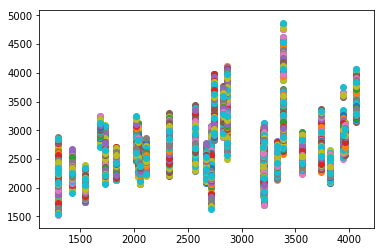

In [78]:
os.chdir('C:/Users/murat.ozemre/Desktop/Thesis_Project/Data_Sources_and_Preparation')
#MonthSeries_option=["1","12"]
#MonthSeries_option=["1",'_12','_123','_1236','_1236_12',"2","3","6","12",'_12']
MonthSeries_option=["1",'_12','_123',"2",'_23','_234',"3",'_34','_345',"4",'_45','_456',"5",'_56','_567',"6",'_67','_678',
                    "12",'_1236','_123456','_1236_12',]

results_level1 = pd.DataFrame()
results_level2 = pd.DataFrame()
feature_results_level1 = pd.DataFrame()
Percent_option=[100,75,50,25]

number_of_split=5
 

random_state_options=np.random.randint(1,100,size=number_of_split)


    
for month in MonthSeries_option:

#    MonthSeries=month

    X = Data_Core1.parse('X{}'.format(month), header=0,index_col=None, na_values=['NA'])
    X.drop(['Date','Year','Month'], axis=1, inplace=True)
    X_Column_Names=list(X.columns.values)
    n_feature=X.shape[1]

    #Get Feature Importance
    number_of_split_for_feature=100
    feature_result=experim.get_feature_importance_result (X,dependent_variable,Z,n_feature,number_of_split_for_feature)
    scored_feature_indices=feature_result[0]
    feature_score=feature_result[1]
    
    # Record feature importances
    feature_results_level1[str(month)]=feature_result
    
    # Implement Feature Importance to each month variance    
    for percent in Percent_option:
    
        percentile=100-percent
        threshold_for_feature_selection=np.percentile(feature_score[scored_feature_indices], percentile)
        X_threshold=X.iloc[:,scored_feature_indices[feature_score[scored_feature_indices]>threshold_for_feature_selection]]
    
        R2result=[]
        Convert_R2result=[]
        
        for turn in range(number_of_split):
            random=random_state_options[turn]
            
            lag=0

            # en sondaki x adet veriyi eğitime sokmamak için
            Scaled_Train_Test_Split=experim.X_Y_scaler_train_test_Split(X_threshold.iloc[:len(y)-lag,:],
                                                            dependent_variable[:len(y)-lag],
                                                            Z.iloc[:len(y)-lag,:],random=random)

            

            X_train = Scaled_Train_Test_Split[0]
            X_test = Scaled_Train_Test_Split[1]
            y_train = Scaled_Train_Test_Split[2]
            y_test = Scaled_Train_Test_Split[3]
            scaler_X = Scaled_Train_Test_Split[4]  
            scaler_y = Scaled_Train_Test_Split[5]
            scaled_value_X=Scaled_Train_Test_Split[6]
            scaled_value_y=Scaled_Train_Test_Split[7]

            # Random Foest Regressor model
            rfc=RandomForestRegressor(n_estimators=300)

            # Random Foest Regressor model train
            RandomForestRegressor.fit(rfc,X_train,y_train)

            # Random Foest Regressor mode predict
            y_predict_test = rfc.predict(X_test)

            # Compare predicted Y and real Y 
            #R2=experim.inverse_scale_and_graph_Y_predict_and_test(y_predict_test,y_test,scaler_y,'YES',dependent_variable_type)[3]
            
            exp_result=experim.inverse_scale_and_graph_Y_predict_and_test(y_predict_test,y_test,scaler_y,'YES',dependent_variable_type)
            
            Converted_R2=exp_result[2]
            Original_R2=exp_result[3]
            
            print ('month',month,'percent',percent,'Original R2 value',Original_R2,'R2 value converted',Converted_R2)
            #R2result.append(R2)
            Convert_R2result.append(Converted_R2)
        
        #results_level1[str(percent)]=R2result
        results_level1[str(percent)]=Convert_R2result
        results_level1['month']=month
    
    results_level2=pd.concat([results_level2,results_level1])

results_level2.set_index(['month'],inplace=True)



In [79]:
os.chdir('C:/Users/murat.ozemre/Desktop/Thesis_Project/Data_Learning_Prediction')

# Read from Excel Tuning paremeters

#abc = pd.ExcelFile('FeatureSelection.xlsx')
#abcd = abc.parse('{}_{}_{}'.format(841810,Exp_Country,Imp_Country), header=0,index_col=None, na_values=['NA'])


# Write to Excel this and previous Tuning paremeters
writer = pd.ExcelWriter('FeatureSelection_{}_{}_{}_{}.xlsx'.format(Exp_Country,Imp_Country,Product,dependent_variable_type))
results_level2.to_excel(writer,'Results')
feature_results_level1.to_excel(writer,'Importances')

writer.save()

# For Combination of Month and Feature with Multiple Runs End

In [ ]:
#Read feature importances from Feature Selection excels

feature_results_from_excel = pd.ExcelFile('FeatureSelection_{}_{}_{}.xlsx'.format(Exp_Country,Imp_Country,Product))
feature_results = feature_results_from_excel.parse('Importances', header=0,index_col=None, na_values=['NA'])
scored_feature_indices=feature_results[str(month)][0]
feature_score=feature_results[str(month)][1]

In [ ]:
results_level2.loc['1'].boxplot()

In [ ]:
feature_results_level1['1'][0]

In [ ]:
feature_results_level1['1'][1]

In [ ]:
results_level2.loc['12'].boxplot()


In [ ]:
results = DataFrame()
results_exp = DataFrame()

results_exp[str(slv)] =
results=pd.concat([results,results_exp])


In [ ]:
# 1 Version for Feature selection
# Internetten bulunan kod blogu
# Random Forest'a gore Feature Importance Hesaplama
# Butun veri setinin girildiği ona göre önemli olan özelliklerin bulundugu kod parçası

ScalerType = Scalertype=Scaler_Type_Options[0]
n_sample=len(X)

rfc=RandomForestRegressor(n_estimators=3000)
RandomForestRegressor.fit(rfc,scaled_value_X,scaled_value_y)


predictions = rfc.predict(X_test)
print('MAE',int(metrics.mean_absolute_error(y_test, predictions)),
      'MSE',int(sqrt(metrics.mean_squared_error(y_test, predictions))),
      'R2',int(1000*(metrics.r2_score(y_test, predictions)))/1000
     )


importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_],axis=0)

indices = np.argsort(importances)[::-1]


# Print the feature ranking
print("Feature ranking:")

for f in range(n_feature):
    print("%d. feature %s %d (%f) %f" % (f+1, X_Column_Names[indices[f]], indices[f], importances[indices[f]],std[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("{} and -{} Month Feature Importances and Standart Deviation of Features with 3000 Different Estimations".format(Product,MonthSeries))
plt.bar(range(n_feature), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(n_feature), indices,rotation=90)
plt.xlim([-1, n_feature])

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
plt.savefig("Plots_Feature_Selection/{} and -{} Month Feature Importances and Standart Deviation of Features with 3000 Different Estimations.png".format(Product,MonthSeries), format='png', dpi=300)

plt.show()

In [ ]:
#  2 Version for Feature selection 
# Internetten bulunan kod blogu http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html
# Feature Importance Hesaplama
# Burada asıl özellik bir veri seti yaratılıyor make_regression ile. Ve oaradakilere dogru çalışıp çalışmadığı test ediliyor.
# Butun veri setinin girildiği ona göre önemli olan özelliklerin bulundugu kod parçası

from sklearn.datasets import make_regression


n_sample=len(X)

number_of_split=100
number_of_row=29

random_state_options = np.arange(0,number_of_split)
y_predict= np.ones((number_of_row, number_of_split))

feature_indices = np.ones((n_feature, number_of_split))
feature_importances=np.ones((n_feature, number_of_split))
feature_indices_score=np.ones((n_feature))
feature_importances_score=np.ones((n_feature))
j=0


# For different split sets Random Forest Regressor runs.

for random_state_i in random_state_options:

    X_train, X_test, y_train, y_test = train_test_split(scaled_value_X,scaled_value_y,test_size=0.2,random_state=random_state_i,stratify=Z['Month'])

    

    rfc=RandomForestRegressor(n_estimators=30)
    RandomForestRegressor.fit(rfc,X_train,y_train)

    y_predict[:,j] = rfc.predict(X_test)
    
    result=experiminverse_scale_and_graph_Y_predict_and_test (y_predict[:,j],y_test,scaler_y,'NO')
    
    importances = rfc.feature_importances_
    std = np.std([tree.feature_importances_ for tree in rfc.estimators_],axis=0)

    indices = np.argsort(importances)[::-1]
    feature_indices[:,j]=indices
    feature_importances[:,j]=importances
    j=j+1
    

print ("Features scores:")    
for i in range(n_feature):
    feature_indices_score[i]=0
    feature_importances_score[i]=0
    for j in range(number_of_split):
        
        indice_coeff=feature_indices[i,j]
        importances_coeff=feature_importances[i,j]
        
        feature_indices_score[i]=feature_indices_score[i]+(indice_coeff)
        feature_importances_score[i]=feature_importances_score[i]+(importances_coeff)
        
#        print('feat=',i,'#ofsplit=',j,'tot_indice',feature_indices_score[i],
#              'indice=',indice_coeff,'tot_importan=',feature_importances_score[i],'importan',importances_coeff )

    print( i,X_Column_Names[i])#,feature_indices_score[i],'number_of_split',j+1) #,X_Column_Names[feature_indices[i,j]])
    
scored_feature_indices = np.argsort(feature_indices_score)
scored_feature_importances = np.argsort(feature_importances_score)
    
 
    
    
# Plot the feature importances of the forest
plt.gcf().clear()
plt.figure()
plt.title("{} and -{} Month Cumulative Feature Importances with {} Different Splits.png".format(Product,MonthSeries,number_of_split))
plt.bar(range(n_feature), feature_importances_score[scored_feature_importances][::-1],
       color="r",  align="center")
plt.xticks(range(n_feature), scored_feature_importances[::-1],rotation=90)
plt.xlim([-1, n_feature])

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size
plt.savefig("Plots_Feature_Selection/{} and -{} Month Cumulative Feature Importances with {} Different Splits.png".format(Product,MonthSeries,number_of_split), format='png', dpi=300)

plt.show()